<a href="https://colab.research.google.com/github/edu-vasconcelos/Analizing-data-airbnb/blob/main/Airbnb_Data_NYC_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análise dos Dados do Airbnb - New York City

<center><img alt="New York" width="80%" src="https://github.com/edu-vasconcelos/Analizing-data-airbnb/blob/main/AdobeStock_310422728_Preview_Editorial_Use_Only.jpeg?raw=true"></center>


O [Airbnb](https://www.airbnb.com.br/) é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

O [Airbnb](https://www.airbnb.com.br/) já **hospedou mais de 1 bilhão** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados dos meses de setembro, outubro e novembro de 2022, referentes à cidade de Nova York e veremos quais insights podemos extrair a partir dos dados brutos.**

#**Introduçao**

Nova York é uma das cidades mais icônicas do mundo e é conhecida por sua cultura vibrante, arranha-céus icônicos e vida noturna agitada. A cidade é um dos principais destinos turísticos do mundo, atraindo milhões de visitantes todos os anos. O turismo é um dos principais setores da economia de Nova York, gerando milhões de empregos e bilhões de dólares em receitas.

No entanto, nos últimos anos, a cidade tem enfrentado desafios relacionados ao setor hoteleiro devido à popularidade do Airbnb. Isso tem sido visto como uma ameaça para o setor hoteleiro tradicional, uma vez que os preços do Airbnb são geralmente mais acessíveis do que os preços dos hotéis.

Para lidar com o crescimento do Airbnb, a cidade de Nova York implementou regulamentações específicas para os aluguéis de curto prazo. Desde 2010, é ilegal alugar uma propriedade em Nova York por menos de 30 dias, a menos que o proprietário esteja presente durante toda a estadia. Além disso, o Airbnb é obrigado a fornecer à cidade informações sobre todos os seus anfitriões e suas propriedades.

Em suma, Nova York é uma cidade icônica que atrai milhões de visitantes todos os anos e o turismo é um importante setor econômico. No entanto, a popularidade do Airbnb tem gerado tensão com o setor hoteleiro tradicional e levado a implementação de regulamentações específicas para os aluguéis de curto prazo na cidade. Veremos um pouco mais sobre essa regulamentação no decorrer das nossas análises.

# Obtenção dos Dados e Pacotes Utilizados


In [1]:
# Pacotes Utilizados

!pip install cartopy
!pip install folium
!pip install folium --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 51.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 92.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 5.2 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp39-cp39-linux_x86_64.whl size=11113648 sha256=c7be0dd431308733e70b54f9ff9067d94a447b062db2c0cb680048b3c0649178
  Stored in directory: /root/.cache/pip/wheels/74/b9/f5/2c94acd7cd21480e6cf63169144d7aac3e8d9cf638225ed578
Successfully built cartopy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import folium as folium
from folium.plugins import HeatMap
import seaborn as sns
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from folium.plugins import FastMarkerCluster
import matplotlib.ticker as mtick


In [3]:
# Data Base Utilizado para o DataFrame - Arquivo listings.csv - New York City

df = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2022-12-04/visualisations/listings.csv")


<ipython-input-3-44dd9dd7c6f7>:3: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2022-12-04/visualisations/listings.csv")


##As 5 primeiras e as 5 últimas entradas do dataset

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,21,3,2022-08-10,0.03,1,267,1,NaN
1,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.73,1,0,0,NaN
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,322,0,NaN
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,559,2022-11-20,3.38,1,79,50,NaN
4,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,175,30,49,2022-06-21,0.31,3,365,1,NaN


In [5]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
41528,771962449581256963,Romántico y natural,421601513,Juan Carlos,Manhattan,Washington Heights,40.847271,-73.943419,Private room,80,5,0,NaN,NaN,3,358,0,NaN
41529,771967712456918474,Sunset Park Studio Sublet,326495,Laura Adriana,Brooklyn,Sunset Park,40.638329,-74.016710,Entire home/apt,42,30,0,NaN,NaN,3,89,0,NaN
41530,771971759808918693,9B5B Townhouse w/ Elevator & Private Entrance,316920152,Allison,Manhattan,Murray Hill,40.746902,-73.978260,Entire home/apt,3888,2,0,NaN,NaN,8,365,0,NaN
41531,771971822371481471,Huge 9B5B Townhouse w Elevator & Private Entr...,484979380,Natasha,Manhattan,Murray Hill,40.749596,-73.980798,Entire home/apt,3888,2,0,NaN,NaN,2,364,0,NaN
41532,771975190766692224,Lovely Big Studio for Rental Bronx City,426540801,Abul,Bronx,Unionport,40.832824,-73.852371,Entire home/apt,80,3,0,NaN,NaN,2,365,0,NaN


In [6]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

##**Dicionário das variáveis**

* id - Identificador exclusivo do Airbnb para o anúncio
* name - Descrição da propriedade
* host_id - Identificador exclusivo do Airbnb para o anfitrião/usuário
* host_name - Nome do anfitrião. Apenas o primeiro nome
* neighbourhood_group - Grupo de bairros
      ** Os bairros de Nova York são divididos em cinco grandes regiões geográficas chamadas de boroughs (ou distritos). 
       Ex: Os bairros de Midtown e Hudson Yards integram o boroughs Manhattan
* neighbourhood - Nome do Bairro
* latitude - Latitude do Imóvel
* longitude - Longitude do Imóvel
* room_type - Tipo de quarto
* price - Preço US$
* minimum_nights - Noites minímas exigidas para reserva
* number_of_reviews - Número de avaliações que a propriedade possui
* last_review - Data da última avaliação
* reviews_per_month - Avaliações por mês
* calculated_host_listings_count - Quantidade de imóveis do mesmo anfitrião na mesma região geográfica
* availability_365 - número de dias de disponibilidade dentro dos próximos 365 dias
* number_of_reviews_ltm - Número de Avalições nos últimos 12 meses
* license - Esta coluna não contém nenhum valor válido


# **1. Atributos (variáveis) e quantidade de entradas o conjunto de dados possui**

#### Identificando o volume de dados do DataFrame

In [7]:
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

Entradas:	 41533
Variáveis:	 18



#### Identificando o tipo do conteúdo das variáveis

In [8]:
display(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

# **2. Valores ausentes no dataset**


Feitas as primeiras análises de estrutura do dataset já sabemos com quantas variáveis temos, qual tipo de dado tem em cada uma delas e que se refere cada uma delas. Agora iremos verificar a quantidade de valores ausentes e como trataremos esses valores caso a caso.


In [9]:
print("Total de Entradas:\t {}".format(df.shape[0]))
print()
print(df.isnull().sum().sort_values(ascending=False).head(10))
print()
print(((df.isnull().sum() / df.shape[0]).sort_values(ascending=False)*100).head(10))


Total de Entradas:	 41533

license                           41532
reviews_per_month                  9393
last_review                        9393
name                                 13
host_name                             5
minimum_nights                        0
number_of_reviews_ltm                 0
availability_365                      0
calculated_host_listings_count        0
number_of_reviews                     0
dtype: int64

license                           99.997592
reviews_per_month                 22.615751
last_review                       22.615751
name                               0.031300
host_name                          0.012039
minimum_nights                     0.000000
number_of_reviews_ltm              0.000000
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
dtype: float64


A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

Podemos veriricar que:

 * A variável "name" tem 13 entradas ausentes e a "host_name" tem 5 entradas entradas ausentes, o que corresponde a 0.03% e 0.01% respectivamente.
 * a variável "license" esta com 99.99% dos seus dados nulos.
 * As variável "reviews_per_month" e "last_review", ambas tem 9,993 entradas ausentes, o que correnponde a 23%.


O primeiro passo será realizar a exclusão das variáveis 'lincense', 'last_review' e 'reviews_per_month', pois a primeira está com 99,99% e as duas últimas com 23% de dados ausentes e também nenhuma delas afetará ou será objeto de nossa análise.
Faremos isso utilizando o m'wtodo `drop` e assim excluindo a variável inteira.


In [10]:
df_clean = df.copy()

In [11]:
df_clean.drop('license', axis=1, inplace=True)
df_clean.drop('last_review', axis=1, inplace=True)
df_clean.drop('reviews_per_month', axis=1, inplace=True)

Agora vamos analisar os dados ausente das variáveis 'name' e 'host_name'.
>
Essas variáveis estão com poucas entradas com dados nulos, a primeira tem 13 e a segunda 5 entradas com dados nulos. Dessa forma, faremos a exlusão dessas entradas pois não trará impacto em nossas análises.
Vamos utilizar o método `dropna` para exlcuir apenas as entradas que estiverem com valor nulo nestas variáveis.


In [12]:
#Excluindo apneas as entradas nulas
df_clean.dropna(subset=['name'], axis=0, inplace=True)
df_clean.dropna(subset=['host_name'], axis=0, inplace=True)

Após essas correções o dataset ficou da seguinte forma:

In [13]:
print("Total de Entradas:\t {}".format(df_clean.shape[0]))
print()
print(df_clean.isnull().sum().sort_values(ascending=False).head(10))
print()
print(((df_clean.isnull().sum() / df.shape[0]).sort_values(ascending=False)*100).head(10))

Total de Entradas:	 41515

id                     0
name                   0
host_id                0
host_name              0
neighbourhood_group    0
neighbourhood          0
latitude               0
longitude              0
room_type              0
price                  0
dtype: int64

id                     0.0
name                   0.0
host_id                0.0
host_name              0.0
neighbourhood_group    0.0
neighbourhood          0.0
latitude               0.0
longitude              0.0
room_type              0.0
price                  0.0
dtype: float64


In [14]:
#Verificando o Antes e Depois
print("Tinhamos {} entradas e agora temos {} entradas".format(df.shape[0], df_clean.shape[0]))
print("Tinhamos {} variáveis e agora temos {} variáveis".format(df.shape[1], df_clean.shape[1]))

Tinhamos 41533 entradas e agora temos 41515 entradas
Tinhamos 18 variáveis e agora temos 15 variáveis


Com esse tratamento realizado nos dados nulos conseguimos manter todas as entradas do dataset sem perder a consistencia desses dados.

# **3. Distribuição das variáveis e Identificando *OUTLIERS*** 

Agora faremos um exame de como está a distribuição das variáveis. 
Para isso iremos plotar um histograma geral e analisar quadro a quadro.

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>],
       [<Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>],
       [<Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'number_of_reviews_ltm'}>]], dtype=object)

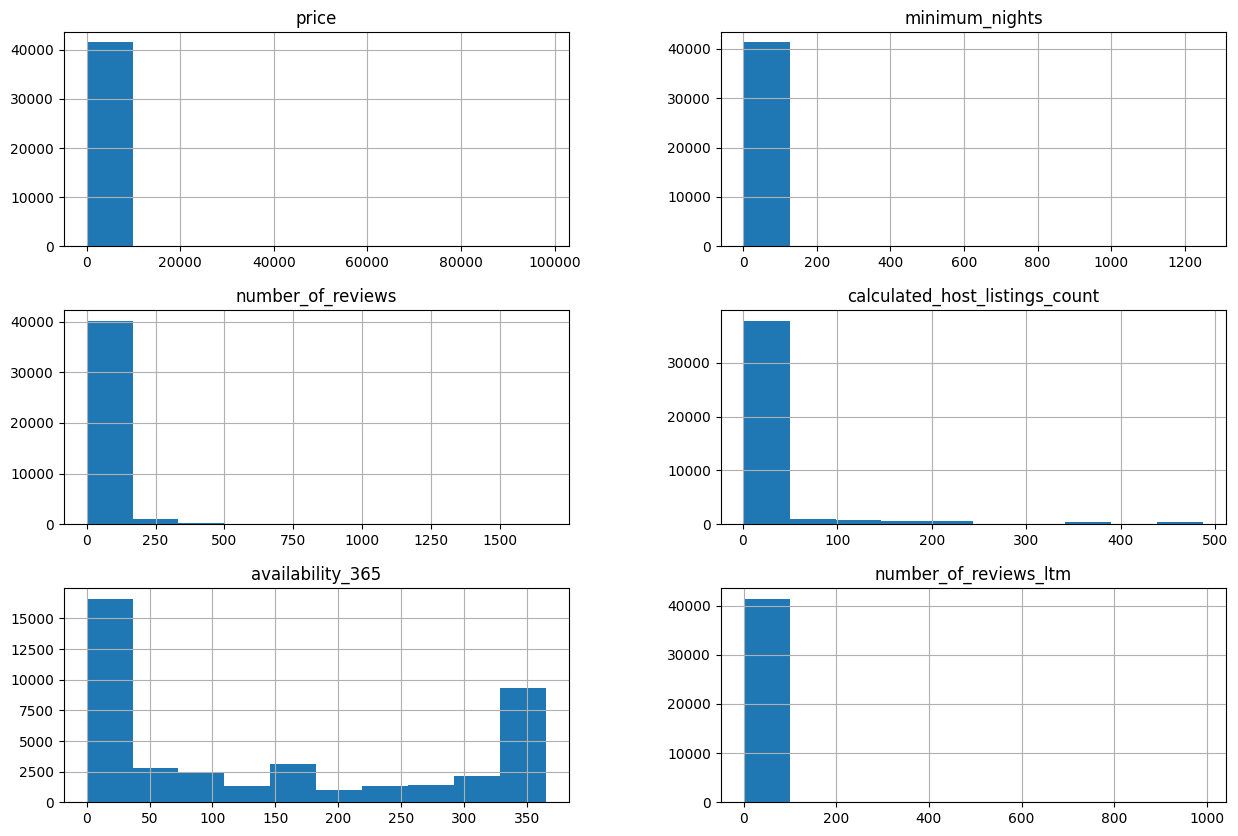

In [15]:
# plotando um histograma das variáveis numéricas
df_clean.hist(['price','minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'], bins=10, figsize=(15,10))

Com base nos histogramas plotados podemos ver que existe uma grande disperção nos dados, isso demonstra a possivel presença de ***outliers***. Tendo isso em vista, iremos analisar caso a caso para identificar e tratar esses possiveis ***outliers***

#**4.Identificando e Tratando os OUTLIERS**



Para iniciarmos a nossa investigação de ***outliers*** utilizamos a distribuição em histograma, o que torna possível a visualização da disposição dos dados. Podemos ver nas variáveis 'price','minimum_nights', 'number_of_reviews', 'calculated_host_listings_count' 'availability_365', 'number_of_reviews_ltm', que elas não tem uma distribuição dos dados dentro do histograma que seja possivel fazer uma análise e distorcem a representação gráfica, o que indica a presença de ***OUTLIERS***.

Para confirmar ***outliers***, iremos utilizar duas maneiras rápidas que auxiliam a detecção de outliers. São elas:

* Resumo estatístico  das variáveis numéricas por meio do método `describe()`
* Plotar um `boxplot` para cada variável.

In [16]:
df_clean[['price','minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,41515.000000,41515.000000,41515.000000,41515.000000,41515.000000,41515.000000
mean,222.006118,18.587185,26.214790,20.635192,143.341250,7.987161
std,919.694979,30.704991,56.188805,68.888141,144.277758,18.567174
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,80.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,131.000000,10.000000,5.000000,1.000000,87.000000,1.000000
75%,220.000000,30.000000,25.000000,4.000000,312.000000,8.000000
max,98159.000000,1250.000000,1666.000000,487.000000,365.000000,992.000000


De acordo com o resumo estatístico acima verificamos as seguintes situações:

* Na variável 'price' temos o valor mínimo igual a 0 (zero) o que pode ser um erro de preenchimento no dataset ou anúncios que foram cancelados na platoforma, de qualquer forma, esses dados estão claramente errados e alterando as demais estátisticas da variável. Como também temos o valor máximo de 98,159.00 o que provevelmente é um erro pois nenhum imóvel no mundo custaria 98mil doláres a noite, corroborando com esse entendimento, nós temos 75% dos valores menores que 220.00 dolares por noite.
* Na variável 'minimum_nigths' temos 75% dos valores abaixo de 30 dias e o maior está como 1,250.00, o que é bem acima de 365 dias no ano.
* Na variável 'number_of_reviews' temos 75% dos valores abaixo de 25 e seu valor máximo é de 1,666.00.
* Na variável 'calculated_host_listings_count' 75% é menor do que 4 e seu valor máximo é 487, isso indica que poucas pessoas são proprietárias de mais de 4 unidade anunciadas.
* Na variável 'availability_365' temos dados coerentes pois o máximo está em 365, o que siginifica que algum imóvel ficou disponivel para hospedagem durante o ano todo e o mínimo está em zero, ou seja, algum imovél passou o ano todo locado.
* Na variável 'number_of_reviews_ltm' tem 75% dos valores abaixo de 8 e seu valor máximo está em 992.00, o numero máximo muito elevado está distorcendo os números dessa variável.
>
Esses dados desmonstram há a presença de ***OUTLIERS***, pois temos valores máximos muito acima do que 75% das entradas. 
>
Para tratarmos esses ***outliers*** identificados acima, iremos utilizar o médoto de IQR para definirmos, com base estátistica, qual será o valor máximo e mímino para cada uma das variáveis e assim teremos uma visão melhor no histograma sem prejudicar a qualidade dos dados.
>
Faremos da seguinte forma:
 

1. Definir o Q1 e Q3 para as variáveis que serão limpas
2. Calcular o IQR para as variáveis.*
3. Definir o limite superior e inferior para cortar os outliers.
4. Remover os outliers.

>>*O IQR é uma medida estatística que ajuda a entender a dispersão dos dados em um conjunto de observações. Ele é calculado a partir dos valores que dividem os dados em quatro partes iguais, chamados quartis.
>Para calcular o IQR, você precisa encontrar o valor do primeiro quartil (Q1) e do terceiro quartil (Q3). O IQR é a diferença entre o valor do terceiro quartil e o valor do primeiro quartil.
>O IQR é útil para identificar valores extremos (outliers) e comparar a variabilidade entre diferentes grupos ou amostras.


###4.1 Variável 'price'

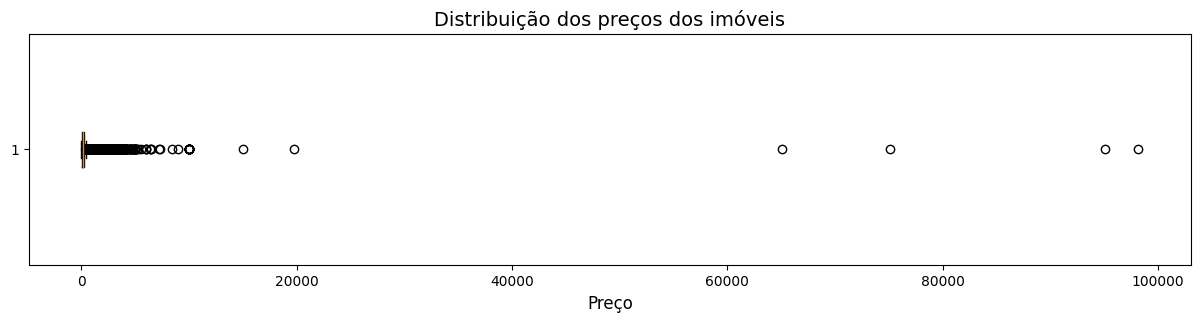

In [17]:
#Boxplot antes de retirarmos os outliers
plt.figure(figsize=(15, 3))
plt.boxplot(df_clean.price, vert=False)
plt.xlabel('Preço', fontsize=12)
plt.tick_params(axis='both', labelsize=10)
plt.title('Distribuição dos preços dos imóveis', fontsize=14)
plt.show()

In [18]:
#Calculo do IQR para a variável 'price'
q1_price = df_clean.price.quantile(.25)
q3_price = df_clean.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

# definindo os limites                                       
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price
# operador condicional para substituir valor negativo por zero
inf_price2 = 0 if inf_price <= 0 else inf_price


print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)
print()
print(f"Valores acima de:", sup_price)
print("{} entradas".format(len(df_clean[df_clean.price > sup_price])))
print("{:.4f}%".format((len(df_clean[df_clean.price > sup_price]) / df.shape[0])*100))
print()
print(f"Valores abaixo de:", inf_price2)
print("{} entradas".format(len(df_clean[df_clean.price <= inf_price2])))
print("{:.4f}%".format((len(df_clean[df_clean.price <= inf_price2]) / df.shape[0])*100))


IQR da variável price:  140.0
Limite superior de price:  430.0
Limite inferior de price:  -130.0

Valores acima de: 430.0
3216 entradas
7.7432%

Valores abaixo de: 0
30 entradas
0.0722%


Conforme o resultado do IQR o valor que será considerado como máximo para a variável 'price' será de 430.00 e o minímo como não temos entradas com valores negativos nesta variável, vamos retirar todos os valor que forem igual a zero.
Podemos ver que a quantidade de entradas com valores acima do limite maximo dado pelo calculo do IQR corresponde a 7.75% (3,216 entrads) e as entradas igual ou abaixo do limite minimo correspondem a 0.07% (30 entradas) do total do nosso dataset. Com essa informação, podemos ver que são pequenas alterações e assim seguirmos com as exclusões desses outliers pois não afetará a qualidade dos dados.

Para a exclusão dessas entradas usaremos o método de `drop` e iremos plotar novamente um boxplot para verificação.


In [19]:
#Exluindo as entradas acima ou abaixo dos limites estipulados
df_clean.drop(df_clean[df_clean.price == 0]. index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price > 430]. index, axis=0, inplace=True)

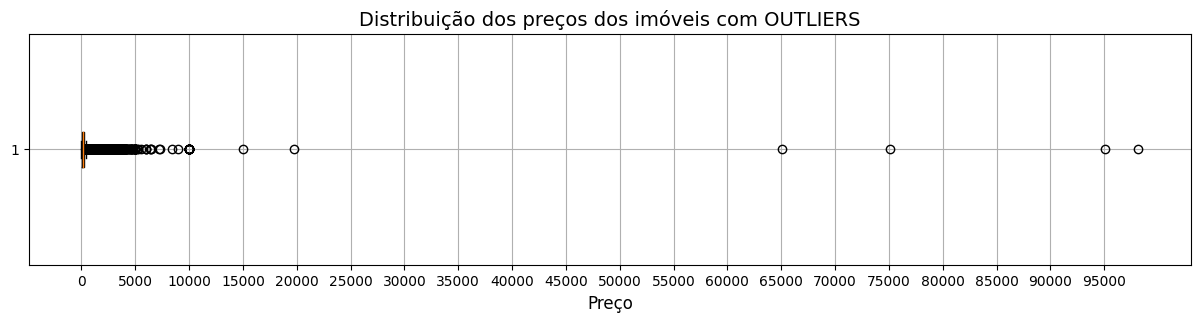

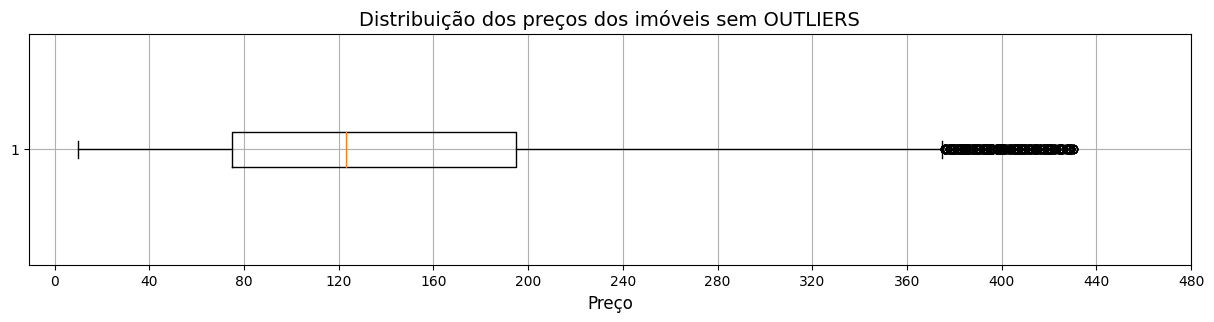


Comparativo da quantidade de entradas
Tamanho original: 41533 Entradas
Tamanho atual: 38269 Entradas


In [20]:
# Criando um box plot para o dataset com outliers
plt.figure(figsize=(15, 3))
plt.boxplot(df.price, vert=False)
plt.xlabel('Preço', fontsize=12)
plt.tick_params(axis='both', labelsize=10)
plt.xticks(np.arange(0, 100000, 5000))
plt.title('Distribuição dos preços dos imóveis com OUTLIERS', fontsize=14)
plt.setp(plt.gca().get_xticklabels(), fontsize=10) # altera tamanho da fonte do rótulo do eixo X
plt.gca().xaxis.grid(True) # Exibe grid vertical
plt.gca().yaxis.grid(True) # Exibe grid horizontal
plt.gca().spines['right'].set_visible(True) # Exibe borda direita
plt.gca().spines['top'].set_visible(True) # Exibr borda superior
plt.show()

# Criando um box plot para o dataset sem outliers
plt.figure(figsize=(15, 3))
plt.boxplot(df_clean.price, vert=False)
plt.xlabel('Preço', fontsize=12)
plt.tick_params(axis='both', labelsize=10)
plt.xticks(np.arange(0, 500, 40))
plt.title('Distribuição dos preços dos imóveis sem OUTLIERS', fontsize=14)
plt.setp(plt.gca().get_xticklabels(), fontsize=10) # altera tamanho da fonte do rótulo do eixo X
plt.gca().xaxis.grid(True) # Exibe grid vertical
plt.gca().yaxis.grid(True) # Exibe grid horizontal
plt.gca().spines['right'].set_visible(True) # Exibe borda direita
plt.gca().spines['top'].set_visible(True) # Exibr borda superior
plt.show()

print()
print("Comparativo da quantidade de entradas")
print("Tamanho original: {} Entradas".format(df.shape[0]))
print("Tamanho atual: {} Entradas".format(df_clean.shape[0]))


O boxplot exibe certos valores que são considerados com outliers, mas é crucial destacar que esses valores foram determinados usando o conjunto de dados atualizado, enquanto a limpeza dos dados foi realizada com base nos quartis do conjunto de dados original.
>
Agora vamos realizar os mesmos procedimentos para a variável 'minimum_nights'.



##4.2 Variável 'minimum_nights'

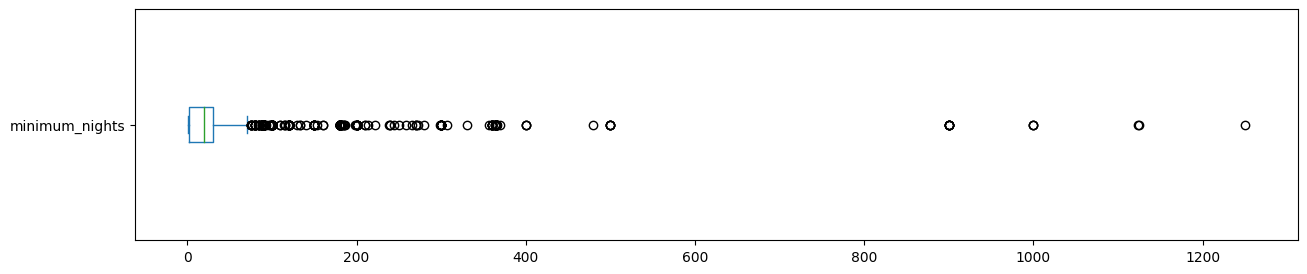

In [21]:
df_clean.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

In [22]:
#Calculo do IQR para a variável 'minimum_night'
q1_night = df_clean.minimum_nights.quantile(.25)
q3_night = df_clean.minimum_nights.quantile(.75)
IQR_night = q3_night - q1_night
print('IQR da variável minimum_nights: ', IQR_night)

# definindo os limites                                       
sup_night = q3_night + 1.5 * IQR_night
inf_night = q1_night - 1.5 * IQR_night
# operador condicional para substituir valor negativo por zero
inf_night2 = 0 if inf_night <= 0 else inf_night

print('Limite superior de minimum_nights: ', sup_night)
print('Limite inferior de minimum_nights: ', inf_night)
print()
print(f"Valores acima de:", sup_night)
print("{} entradas".format(len(df_clean[df_clean.minimum_nights > sup_night])))
print("{:.4f}%".format((len(df_clean[df_clean.minimum_nights > sup_night]) / df.shape[0])*100))
print()
print(f"Valores abaixo de:", inf_night2)
print("{} entradas".format(len(df_clean[df_clean.minimum_nights <= inf_night2])))
print("{:.4f}%".format((len(df_clean[df_clean.minimum_nights <= inf_night2]) / df.shape[0])*100))

IQR da variável minimum_nights:  28.0
Limite superior de minimum_nights:  72.0
Limite inferior de minimum_nights:  -40.0

Valores acima de: 72.0
839 entradas
2.0201%

Valores abaixo de: 0
0 entradas
0.0000%


Conforme o resultado do IQR o valor que será considerado como máximo para a variável 'minimum_nights' será de 72 e o minímo, como não temos entradas com valores negativos nesta variável, vamos considerar zero.
Podemos ver que a quantidade de entradas com valores acima do limite maximo dado pelo calculo do IQR corresponde a 2.02% (839 entrads). Com base nisso podemos ver que são pequenas alterações e assim seguirmos com as exclusões desses outliers pois não afetará a qualidade dos dados.

Para a exclusão dessas entradas usaremos o código de `drop` e iremos plotar novamente um boxplot para verificação.

In [23]:
#Exluindo as entradas acima ou abaixo dos limites estipulados
df_clean.drop(df_clean[df_clean.minimum_nights > sup_night]. index, axis=0, inplace=True)

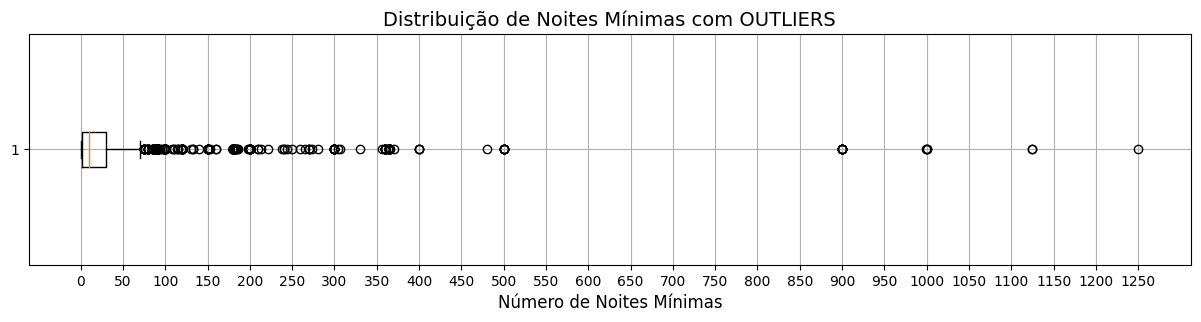

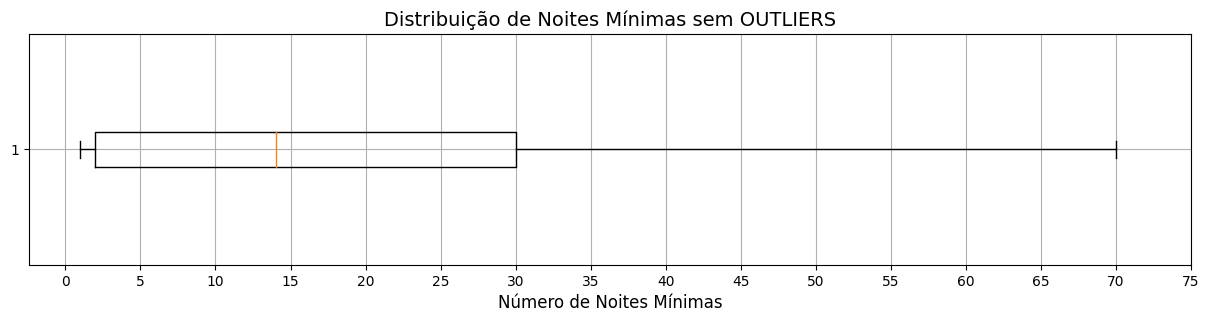


Comparativo da quantidade de entradas
Tamanho original: 41533 Entradas
Tamanho atual: 37430 Entradas


In [24]:
# Criando um box plot para o dataset com outliers
plt.figure(figsize=(15, 3))
plt.boxplot(df.minimum_nights, vert=False)
plt.xlabel('Número de Noites Mínimas', fontsize=12)
plt.tick_params(axis='both', labelsize=10)
plt.xticks(np.arange(0, 1300, 50))
plt.title('Distribuição de Noites Mínimas com OUTLIERS', fontsize=14)
plt.setp(plt.gca().get_xticklabels(), fontsize=10) # altera tamanho da fonte do rótulo do eixo X
plt.gca().xaxis.grid(True) # Exibe grid vertical
plt.gca().yaxis.grid(True) # Exibe grid horizontal
plt.gca().spines['right'].set_visible(True) # Exibe borda direita
plt.gca().spines['top'].set_visible(True) # Exibr borda superior
plt.show()

# Criando um box plot para o dataset sem outliers
plt.figure(figsize=(15, 3))
plt.boxplot(df_clean.minimum_nights, vert=False)
plt.xlabel('Número de Noites Mínimas', fontsize=12)
plt.tick_params(axis='both', labelsize=10)
plt.xticks(np.arange(0, 80, 5))
plt.title('Distribuição de Noites Mínimas sem OUTLIERS', fontsize=14)
plt.setp(plt.gca().get_xticklabels(), fontsize=10) # altera tamanho da fonte do rótulo do eixo X
plt.gca().xaxis.grid(True) # Exibe grid vertical
plt.gca().yaxis.grid(True) # Exibe grid horizontal
plt.gca().spines['right'].set_visible(True) # Exibe borda direita
plt.gca().spines['top'].set_visible(True) # Exibr borda superior
plt.show()

print()
print("Comparativo da quantidade de entradas")
print("Tamanho original: {} Entradas".format(df.shape[0]))
print("Tamanho atual: {} Entradas".format(df_clean.shape[0]))

Podemos ver uma mudança significativa na leitura dos dados após a remoção dos outliers.
Sempre lembrando que os valore tidos como "outliers" no segundo boxplot decorre do fato de que a leitura está sendo feita em cima da base de dados atualizada e a retirada foi feita na base de dados anterior.
>

Seguiremos os mesmos passos para as variáveis 'number_of_reviews', 'calculated_host_listings_count', 'availability_365' e 'number_of_reviews_ltm'.

##4.3 Variável 'number_of_reviews'

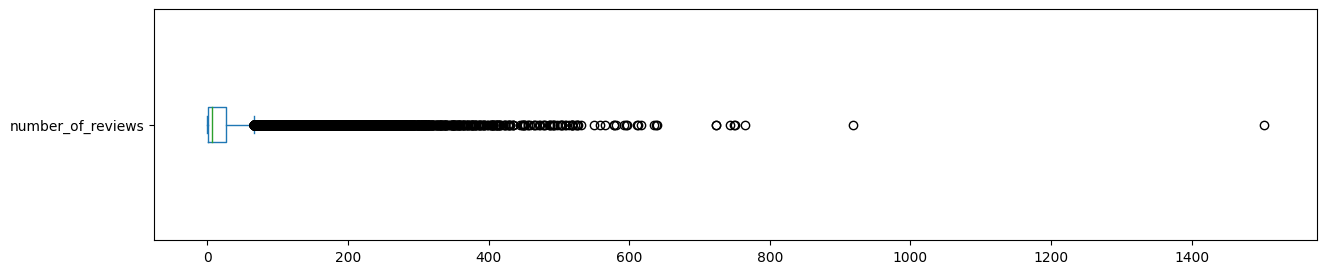

In [25]:
df_clean.number_of_reviews.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

In [26]:
#Calculo do IQR para a variável 'number_of_reviews'
q1_numb = df_clean.number_of_reviews.quantile(.25)
q3_numb = df_clean.number_of_reviews.quantile(.75)
IQR_numb = q3_numb - q1_numb
print('IQR da variável number_of_reviews: ', IQR_numb)

# definindo os limites                                       
sup_numb = q3_numb + 1.5 * IQR_numb
inf_numb = q1_numb - 1.5 * IQR_numb
# operador condicional para substituir valor negativo por zero
inf_numb2 = 0 if inf_numb <= 0 else inf_numb

print('Limite superior de number_of_reviews: ', sup_numb)
print('Limite inferior de number_of_reviews: ', inf_numb)
print()
print(f"Valores acima de:", sup_numb)
print("{} entradas".format(len(df_clean[df_clean.number_of_reviews > sup_numb])))
print("{:.4f}%".format((len(df_clean[df_clean.number_of_reviews > sup_numb]) / df.shape[0])*100))
print()
print(f"Valores abaixo de:", inf_night2)
print("{} entradas".format(len(df_clean[df_clean.number_of_reviews <= inf_numb2])))
print("{:.4f}%".format((len(df_clean[df_clean.number_of_reviews <= inf_numb2]) / df.shape[0])*100))


IQR da variável number_of_reviews:  26.0
Limite superior de number_of_reviews:  66.0
Limite inferior de number_of_reviews:  -38.0

Valores acima de: 66.0
4489 entradas
10.8083%

Valores abaixo de: 0
7558 entradas
18.1976%


Conforme o resultado do IQR o valor máximo para a variável 'number_of_reviews' é de 66 e o minímo, como não temos entradas com valores negativos nesta variável, vamos considerar zero.
Podemos ver que a quantidade de entradas com valores acima do limite maximo dado pelo calculo do IQR corresponde a 10.80% (4,489 entrads). Com base nisso podemos ver que essas alterações teriam grande impacto em nosso conjunto de dados. Por tratar de uma informação que não afetará a análise proposta não realizaremos a exclusão das mesma a fim de preservar a qualidade dos dados.

##4.4 Variável 'calculated_host_listings_count'

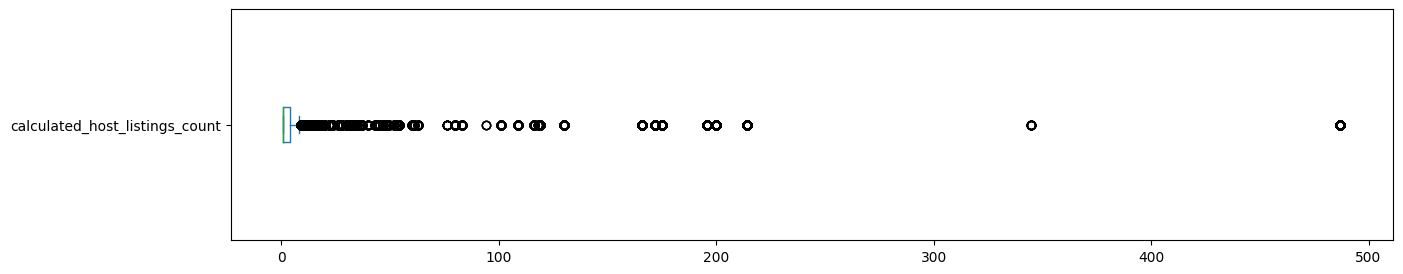

In [27]:
df_clean.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

In [28]:
#Calculo do IQR para a variável 'calculated_host_listings_count'
q1_host = df_clean.calculated_host_listings_count.quantile(.25)
q3_host = df_clean.calculated_host_listings_count.quantile(.75)
IQR_host = q3_host - q1_host
print('IQR da variável calculated_host_listings_count:', IQR_night)

# definindo os limites                                       
sup_host = q3_host + 1.5 * IQR_host
inf_host = q1_host - 1.5 * IQR_host
# operador condicional para substituir valor negativo por zero
inf_host2 = 0 if inf_host <= 0 else inf_host

print('Limite superior de calculated_host_listings_count:', sup_host)
print('Limite inferior de calculated_host_listings_count:', inf_host)
print()
print(f"Valores acima de:", sup_host)
print("{} entradas".format(len(df_clean[df_clean.calculated_host_listings_count > sup_host])))
print("{:.4f}%".format((len(df_clean[df_clean.calculated_host_listings_count > sup_host]) / df.shape[0])*100))
print()
print(f"Valores abaixo de:", inf_night2)
print("{} entradas".format(len(df_clean[df_clean.calculated_host_listings_count <= inf_host2])))
print("{:.4f}%".format((len(df_clean[df_clean.calculated_host_listings_count <= inf_host2]) / df.shape[0])*100))

IQR da variável calculated_host_listings_count: 28.0
Limite superior de calculated_host_listings_count: 8.5
Limite inferior de calculated_host_listings_count: -3.5

Valores acima de: 8.5
5384 entradas
12.9632%

Valores abaixo de: 0
0 entradas
0.0000%


Conforme o resultado do IQR o valor máximo para a variável 'calculated_host_listings_count' é de 8.5 e o minímo, como não temos entradas com valores negativos nesta variável, vamos considerar zero.
Podemos ver que a quantidade de entradas com valores acima do limite maximo dado pelo calculo do IQR corresponde a 12.96% (5,384 entrads). Com base nisso podemos ver que essas alterações teriam grande impacto em nosso conjunto de dados. Ademais, por se tratar de uma informação que não afetará a análise proposta não realizaremos a exclusão das mesma a fim de preservar a qualidade dos dados.

##4.5 Variável 'number_of_reviews_ltm'

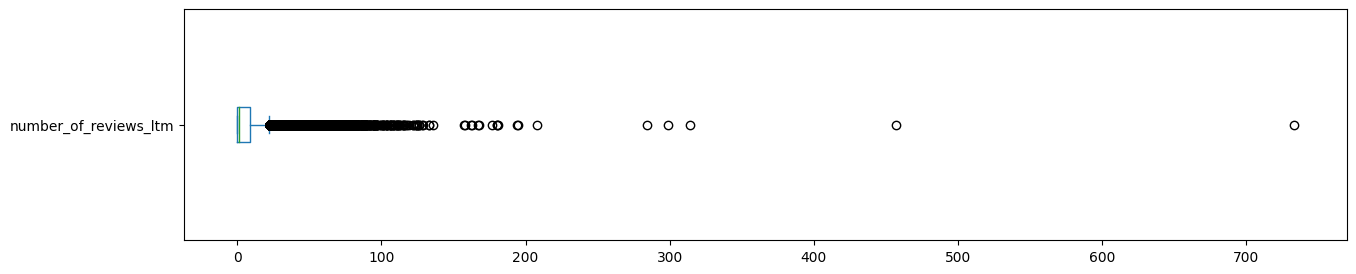

In [29]:
#Plotando um Bloxpot
df_clean.number_of_reviews_ltm.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

In [30]:
#Calculo do IQR para a variável 'number_of_reviews_ltm'
q1_nor = df_clean.number_of_reviews_ltm.quantile(.25)
q3_nor = df_clean.number_of_reviews_ltm.quantile(.75)
IQR_nor = q3_nor - q1_nor
print('IQR da variável number_of_reviews_ltm: ', IQR_nor)

# definindo os limites                                       
sup_nor = q3_nor + 1.5 * IQR_nor
inf_nor = q1_nor - 1.5 * IQR_nor
# operador condicional para substituir valor negativo por zero
inf_nor2 = 0 if inf_nor <= 0 else inf_nor

print('Limite superior de number_of_reviews_ltm: ', sup_nor)
print('Limite inferior de number_of_reviews_ltm: ', inf_nor)
print()
print(f"Valores acima de:", sup_nor)
print("{} entradas".format(len(df_clean[df_clean.number_of_reviews_ltm > sup_nor])))
print("{:.4f}%".format((len(df_clean[df_clean.number_of_reviews_ltm > sup_nor]) / df.shape[0])*100))
print()
print(f"Valores abaixo de:", inf_nor2)
print("{} entradas".format(len(df_clean[df_clean.number_of_reviews_ltm <= inf_nor2])))
print("{:.4f}%".format((len(df_clean[df_clean.number_of_reviews_ltm <= inf_nor2]) / df.shape[0])*100))

IQR da variável number_of_reviews_ltm:  9.0
Limite superior de number_of_reviews_ltm:  22.5
Limite inferior de number_of_reviews_ltm:  -13.5

Valores acima de: 22.5
5002 entradas
12.0434%

Valores abaixo de: 0
17943 entradas
43.2018%


Conforme o resultado do IQR o valor máximo para a variável 'number_of_reviews_ltm' é de 22.5 e o minímo, como não temos entradas com valores negativos nesta variável, vamos considerar zero.
Podemos ver que a quantidade de entradas com valores acima do limite maximo dado pelo calculo do IQR corresponde a 12.04% (5,002 entrads). Com base nisso podemos ver que essas alterações teriam grande impacto em nosso conjunto de dados. Por tanto não realizaremos a exclusão das entradas a fim de preservar a qualidade dos dados.

##4.6 Novo Histograma

Após todas as alterações feita, vamos plotar novamente um histograma apenas das duas variáveis que sofreram alterações.

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>]], dtype=object)

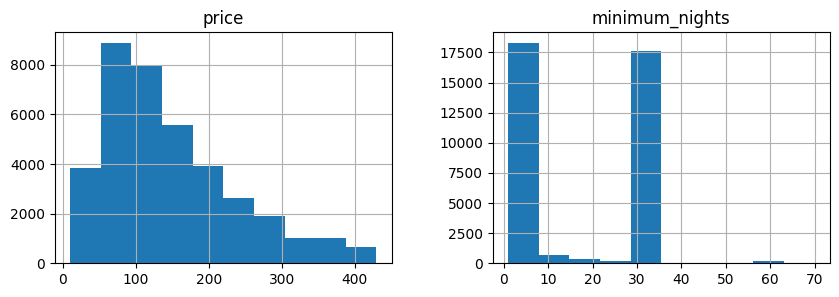

In [31]:
#Plotando histograma após as alterações
df_clean.hist(['price','minimum_nights'], bins=10, figsize=(10, 3))

Podemos percerber que houve uma grande mudança no histrograma dessas variáveis, com isso iremos seguir agora para análise mais profunda dos dados e ver quais insights podemos extrair deles.

#**5. Verificação se  há alguma correlação existente entre as variáveis**

Faremos agora uma veirificação para identificar correlações entre duas ou mais variáveis.

Esta relação pode ser medida, e é a função do coeficiente de correlação estabelecer qual a intensidade dela. Quanto mais o coeficiente de correlação se aproximar de 1.0, maior é a correlação entre elas.

Para identificar se há correlações existentes entre as variáveis iremos utilizar a função `corr` para cirar uma matriz de correlação e em seguida plotaremos um `heatmap` para ficar mais facil a vizualização.

In [32]:
# criando uma matriz de correlação
corr = df_clean[['neighbourhood_group','neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].corr()

# mostrando a matriz de correlação
display(corr)

<ipython-input-32-bcc5d19b3c6a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_clean[['neighbourhood_group','neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].corr()


,latitude,longitude,price,minimum_nights,calculated_host_listings_count,availability_365,number_of_reviews_ltm
latitude,1.000000,0.059548,0.012930,0.080266,0.076229,-0.015045,-0.054654
longitude,0.059548,1.000000,-0.242156,-0.194642,-0.084612,0.155321,0.094342
price,0.012930,-0.242156,1.000000,-0.166304,0.149316,0.117128,0.072438
minimum_nights,0.080266,-0.194642,-0.166304,1.000000,0.169404,-0.222725,-0.453455
calculated_host_listings_count,0.076229,-0.084612,0.149316,0.169404,1.000000,0.150153,-0.065478
availability_365,-0.015045,0.155321,0.117128,-0.222725,0.150153,1.000000,0.190336
number_of_reviews_ltm,-0.054654,0.094342,0.072438,-0.453455,-0.065478,0.190336,1.000000


In [36]:
import plotly.express as px

# Plotar mapa de correlações
fig = px.imshow(corr,
                labels=dict(x="Variáveis", y="Variáveis", color="Coeficiente de correlação"),
                x=corr.columns,
                y=corr.columns,
                color_continuous_scale='RdBu',
                zmin=-1,
                zmax=1)

# Personalizar o gráfico
fig.update_layout(title='Correlação entre variáveis',
                  width=800,
                  height=800,
                  xaxis_showgrid=False,
                  yaxis_showgrid=False,
                  xaxis_tickangle=-45)

# Mostrar o gráfico
fig.show()


Com base no gráfico acima podemos observar que:

A longitude tem uma correlação negativa moderada com o preço, o que sugere que imóveis localizados em regiões com longitudes maiores tendem a ter preços menores.

O preço tem uma correlação positiva fraca com a contagem de anúncios de hosts calculada, indicando que os anfitriões com mais anúncios tendem a cobrar mais caro.

O mínimo de noites tem uma correlação positiva fraca com a contagem de anúncios de hosts calculada, o que sugere que anfitriões com mais anúncios tendem a exigir mais noites mínimas de estadia, muito provavelmente devio a legislação da cidade para os alugueis de curto prazo.

A disponibilidade tem uma correlação positiva fraca com a contagem de anúncios de hosts calculada, o que sugere que anfitriões com mais anúncios tendem a ter mais dias disponíveis ao longo do ano.

O número de avaliações nos últimos 12 meses tem uma correlação negativa moderada com o mínimo de noites e uma correlação negativa fraca com o preço, o que sugere que imóveis com preços mais baixos e requisitos de estadia mínima menores tendem a ter mais avaliações nos últimos 12 meses.

#**<center>CONTINUA NA PARTE 2**

**Faremos uma quebra em nosso notebook para que ele fique visivel no Github.**

In [37]:
#Salvando o dataset em .CSV para deixar disponivel na parte 2 deste notebook.
df_clean.to_csv('df_clean.csv', index=False)
